In [75]:
## [Human Resource Attrition] Data Analysis
# [경영 데이터 분석2 with R ~ Python] clustering_KNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import missingno as msno

HRA = pd.read_csv("C:\RDA02/attrition_CA.csv", index_col = 0)

'''
    file = open(
        "C:\RDA02/attrition_CA.csv",
        "r", encoding = "UTF-8")
    reader = csv.reader( file )
    for line in reader:
        print( line )
    file.close()
    
    writer = csv.writer( file )
    writer.writerow( [list] )
    file.close()
'''

'\n    file = open(\n        "C:\\RDA02/attrition_CA.csv",\n        "r", encoding = "UTF-8")\n    reader = csv.reader( file )\n    for line in reader:\n        print( line )\n    file.close()\n    \n    writer = csv.writer( file )\n    writer.writerow( [list] )\n    file.close()\n'

In [76]:
HRA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14997 entries, 1 to 14999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   left          14997 non-null  int64  
 1   satisfaction  14997 non-null  float64
 2   evaluation    14997 non-null  float64
 3   projects      14997 non-null  int64  
 4   hours         14997 non-null  int64  
 5   years         14997 non-null  int64  
 6   accident      14997 non-null  int64  
 7   promotion     14997 non-null  int64  
 8   department    14997 non-null  object 
 9   salary        14997 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [77]:
HRA.columns
HRA.index
HRA.shape

(14997, 10)

C:\Users\sooyeon Kang\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

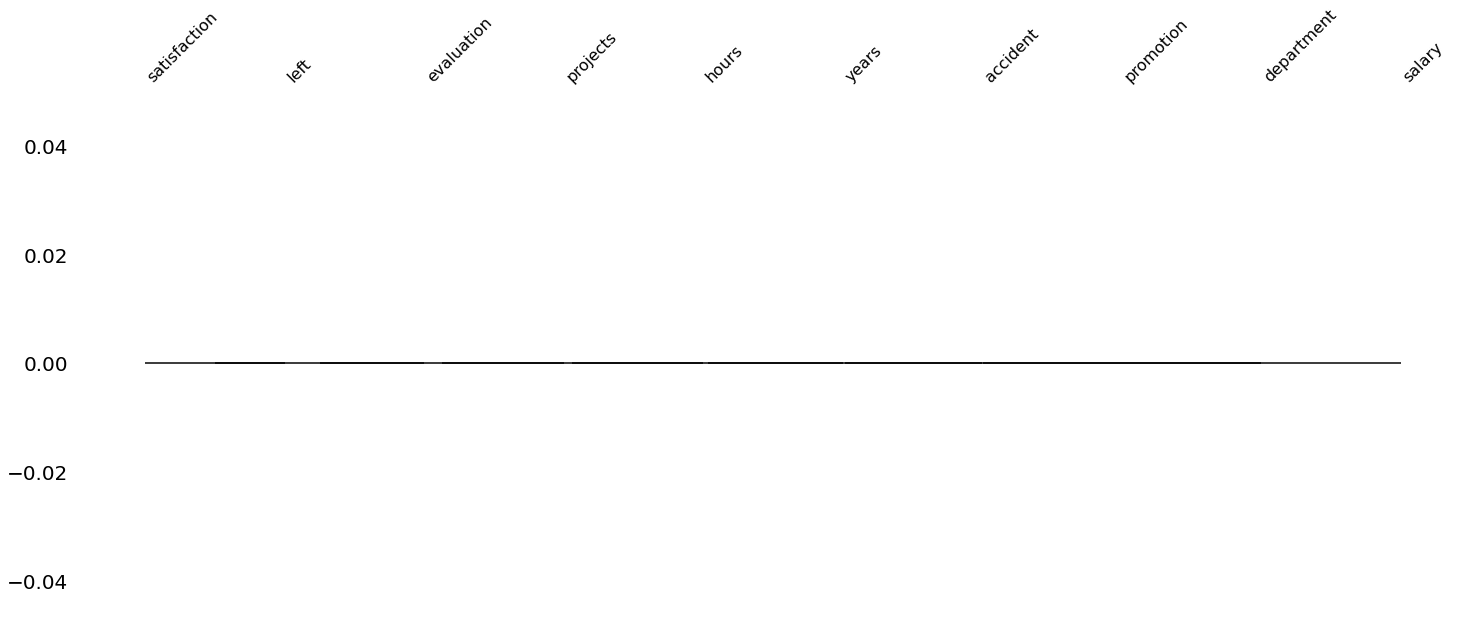

In [78]:
HRA.isnull().sum()
msno.dendrogram(HRA)
    # [결측값 탐색] NA's 0

In [79]:
HRA["accident"] = HRA["accident"].astype("category")
HRA["promotion"] = HRA["promotion"].astype("category")
HRA["department"] = HRA["department"].astype("category")
HRA["salary"] = HRA["salary"].astype("category")
HRA["left"] = HRA["left"].astype("category")
HRA["accident"].dtype
    # [데이터 타입 정수형 ~ 범주형 변환]

CategoricalDtype(categories=[0, 1], ordered=False)

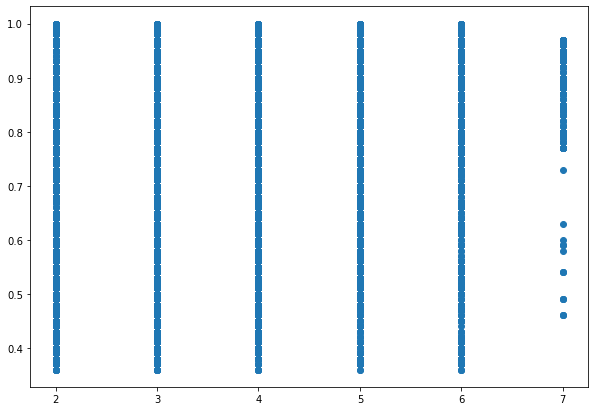

In [80]:
plt.figure(figsize = (10, 7))
plt.scatter(x = HRA["projects"], y = HRA["evaluation"])
plt.show()
    # [project와 evaluation의 산점도]

In [81]:
# Hierarchy Clustering

HRA["department"].unique()
HRA_hr = HRA.loc[HRA.department == "hr", :]
    # [step1: 하위 데이터프레임 작성]

In [82]:
HRA_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 32 to 14979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   left          739 non-null    category
 1   satisfaction  739 non-null    float64 
 2   evaluation    739 non-null    float64 
 3   projects      739 non-null    int64   
 4   hours         739 non-null    int64   
 5   years         739 non-null    int64   
 6   accident      739 non-null    category
 7   promotion     739 non-null    category
 8   department    739 non-null    category
 9   salary        739 non-null    category
dtypes: category(5), float64(2), int64(3)
memory usage: 39.1 KB


In [83]:
HRA_hr["salary"].unique()
    # [step2 : 더미변수 만들고 불필요한 변수 제거]

['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']

In [84]:
def dummy_coding_low(HRA_hr):
    if HRA_hr["salary"] == "low": return 1
    else: return 0
def dummy_coding_med(HRA_hr):
    if HRA_hr["salary"] == "medium": return 1
    else: return 0

HRA_hr["medium"] = HRA_hr.apply(dummy_coding_med, axis = 1)
HRA_hr["low"] = HRA_hr.apply(dummy_coding_low, axis = 1)
# HRA_hr

C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_22220/768404700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRA_hr["medium"] = HRA_hr.apply(dummy_coding_med, axis = 1)
C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_22220/768404700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRA_hr["low"] = HRA_hr.apply(dummy_coding_low, axis = 1)


In [85]:
HRA_hr = HRA_hr.drop("department", axis = 1)
HRA_hr = HRA_hr.drop("salary", axis = 1)
# HRA_hr.drop("id", axis = 1)
    # [범주형 척도로 측정되고, 범주 개수가 3개 이상인 변수를 더미변수로 변경]

In [101]:
from scipy.spatial import distance # distance.euclidean(x, y)
from math import dist # dist(x, y)
from sklearn.neighbors import DistanceMetric 
    # s1 = DistanceMetric.get_metric("manhattan").pairwise( HRA_hr[["satisfaction"]] )
    # s2 = DistanceMetric.get_metric('manhattan').pairwise( HRA_hr[["evaluation"]] )
    # s3 = DistanceMetric.get_metric("dice").pairwise( HRA_hr[["medium"]] )
    # Gowers_Distance = (s1*w1 + s2 *w2 + s3*w3) / (w1 + w2 + w3)

HRA_hr["accident"] = HRA_hr["accident"].astype("bool")
HRA_hr["left"] = HRA_hr["left"].astype("bool")
HRA_hr["promotion"] = HRA_hr["promotion"].astype("bool")
HRA_hr["medium"] = HRA_hr["medium"].astype("bool")
HRA_hr["low"] = HRA_hr["low"].astype("bool")
HRA_hr.info()
import gower
    # [gower's similarity or coefficient] 
    # 계량형 척도는 Manhattan_비계량형 척도는 dice distance
gower = gower.gower_matrix(HRA_hr)[0]
    # [step3: 사례 간 거리 구하기] 
    # [TypeError] Cannot interpret 'CategoricalDtype(categories=[0, 1], ordered=False)' as a data type
                # HRA_hr.select_dtypes(exclude = ["category"] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 32 to 14979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   left          739 non-null    bool   
 1   satisfaction  739 non-null    float64
 2   evaluation    739 non-null    float64
 3   projects      739 non-null    int64  
 4   hours         739 non-null    int64  
 5   years         739 non-null    int64  
 6   accident      739 non-null    bool   
 7   promotion     739 non-null    bool   
 8   medium        739 non-null    bool   
 9   low           739 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 38.2 KB


'\nfrom sklearn.cluster import Kmeans\nkmclust = Kmeans(n_clusters = k).fit(HRA_hr)\nkmclust.labels_\nnp.unique(kmclust.labels_, return_counts = True)\n'

In [114]:
gower = pd.DataFrame(gower)
gower.describe()

,0
count,739.000000
mean,0.321022
std,0.134201
min,0.000000
25%,0.227200
50%,0.310650
75%,0.428488
max,0.761041


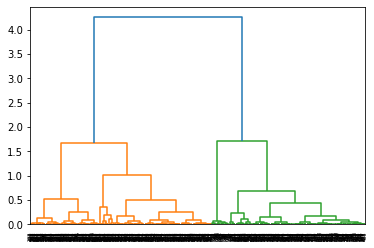

In [126]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

Z = linkage(gower, "ward")
Z
dend = sch.dendrogram(Z)
    # [step4: 덴드로그램 작성]
    # [ward.D2 method로 오차제곱합이 최소인 군집 형성]

C:\Users\sooyeon Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


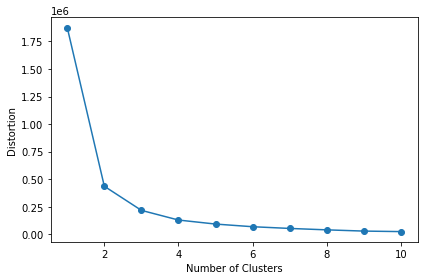

In [143]:
HRA_hr = HRA_hr.astype({"accident": int,
                       "left" : int,
                        "promotion" : int,
                        "medium" : int,
                        "low" : int})
    # gower's similarity가 아닌 euclidean similarity는 범주형을 연속형 변환해야 함    

from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(HRA_hr)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 11), distortions, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()
    # [step5 : 최적의 군집 수 k 산출]